# TAREA SEMANA 3 : FUNDAMENTOS DE PYTHON
## Nombre: Jair Fernando Garcia Macias

### Ejercicio 1
Escribir dos funciones que simulan una calculadora científica que permita calcular el seno, coseno, tangente, exponencial y logaritmo neperiano o natural (logaritmo en base euler).

A. La función uno preguntará al usuario el intervalo donde quiere aplicar la función matemática y la función a aplicar, y mostrará por pantalla una tabla donde la primera columna será los valores del intervalo dado (x) y la columna 2 tendrá los resultados de el resultado de aplicar la función a este intervalo (y).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def funciones_matematicas():
    limite_inferior = int(input('Ingresa límite inferior de la función: '))
    limite_superior = int(input('Ingresa límite superior de la función: '))
    funcion = int(input('Ingresa el número de la función que deseas realizar: '
                        '\n1. Seno'
                        '\n2. Coseno'
                        '\n3. Tangente'
                        '\n4. Exponencial'
                        '\n5. Logaritmo natural\n'))

    if funcion == 1:
        tipo = 'Seno'
    elif funcion == 2:
        tipo = 'Coseno'
    elif funcion == 3:
        tipo = 'Tangente'
    elif funcion == 4:
        tipo = 'Exponencial'
    else:
        tipo = 'Logaritmo'

    rango = range(limite_inferior, limite_superior + 1)

    calculo = {
        'Intervalo': [],
        f'{tipo}': []
    }
    for num in rango:
        if tipo == 'Seno':
            calc = np.sin(num)
        elif tipo == 'Coseno':
            calc = np.cos(num)
        elif tipo == 'Tangente':
            calc = np.tan(num)
        elif tipo == 'Exponencial':
            calc = np.exp(num)
        else:
            calc = np.log(num)
        calculo['Intervalo'].append(num)
        calculo[f'{tipo}'].append(calc)

    tabla = pd.DataFrame(calculo)
    return tabla
funciones_matematicas()

Ingresa límite inferior de la función: 1
Ingresa límite superior de la función: 10
Ingresa el número de la función que deseas realizar: 
1. Seno
2. Coseno
3. Tangente
4. Exponencial
5. Logaritmo natural
3


,Intervalo,Tangente
0,1,1.557408
1,2,-2.185040
2,3,-0.142547
3,4,1.157821
4,5,-3.380515
5,6,-0.291006
6,7,0.871448
7,8,-6.799711
8,9,-0.452316
9,10,0.648361


#### Explicación:
Pude haber solicitado al usuario el nombre de la función que deseaba calcular, pero eso podría haber generado problemas de sintaxis o algo por el estilo, por eso sólo lo dejé como un menú con números.

B. La función dos graficara con matplotlib el resultado de función anterior y la mostrará en pantalla. Recuerden poner los títulos ejes y demás configuraciones de las gráficas para que queden de la mejor manera posible.

Ingresa límite inferior de la función: 1
Ingresa límite superior de la función: 10
Ingresa el número de la función que deseas realizar: 
1. Seno
2. Coseno
3. Tangente
4. Exponencial
5. Logaritmo natural
3


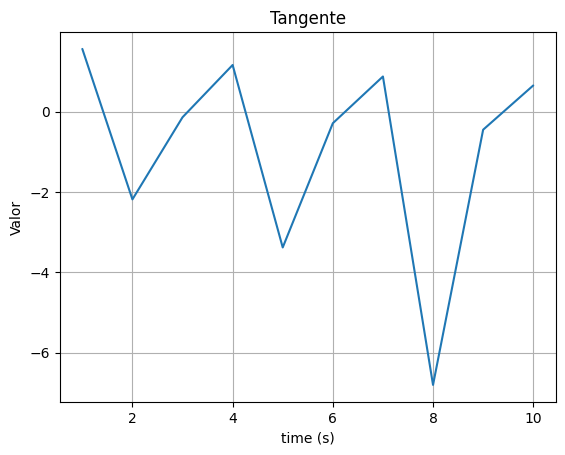

None


In [5]:
def grafica(tabla):
    # Data for plotting
    funcion = tabla.columns[1]
    x = tabla['Intervalo']
    y = tabla[f'{funcion}']
    fig, ax = plt.subplots()
    ax.plot(x, y, solid_capstyle='round')

    ax.set(xlabel='time (s)', ylabel='Valor', title=f'{funcion}')
    ax.grid()
    plt.show()
    
print(grafica(funciones_matematicas()))

#### Explicación:
No hubo mayor complicación. Basta con consultar la página de matplotlib, copiar el código, pegarlo y sustituir los valores.

### Ejercicio 2
Escribir un programa para ver los beneficios de una empresa en un periodo de años.
El programa debe cumplir los siguientes requisitos:

A. El programa tiene que preguntar al usuario por un año inicial y otro final, y después preguntar por los ingresos y egresos de cada año desde el año inicial hasta el año final.

        a) Debe garantizar que por lo menos haya 5 años entre el año inicial y el final.

In [6]:
año_inicial = int(input('Ingresa el año de inicio del periodo: '))
año_final = int(input('Ingresa el año del final del periodo: '))
if año_final - año_inicial >= 4:
    ingresos_egresos = []
    for año in range(año_inicial, año_final + 1):
        ingresos = float(input(f'Ingresa los ingresos del año {año}: '))
        egresos = float(input(f'Ingresa los egresos del año {año}: '))
        fila = [año, ingresos, egresos]
        ingresos_egresos.append(fila)
else:
    print('Para realizar el cálculo se deben contemplear al menos 5 años dentro del periodo...')

Ingresa el año de inicio del periodo: 2000
Ingresa el año del final del periodo: 2004
Ingresa los ingresos del año 2000: 100
Ingresa los egresos del año 2000: 10
Ingresa los ingresos del año 2001: 100
Ingresa los egresos del año 2001: 120
Ingresa los ingresos del año 2002: 100
Ingresa los egresos del año 2002: 120
Ingresa los ingresos del año 2003: 100
Ingresa los egresos del año 2003: 10
Ingresa los ingresos del año 2004: 100
Ingresa los egresos del año 2004: 10


#### Eplicación:
Pude haber solicitado al usuario ingresar los ingresos y egresos en una sola línea, pero lo hice de esta manera para evitar errores.

B. Con los datos introducidos se deben crear un dataframe, con las columnas fecha, ingresos y egresos.

In [8]:
tabla = pd.DataFrame(ingresos_egresos, columns=['Fecha', 'Ingresos', 'Egresos'])

#### Explicación:
Con la librería de pandas, es fácil realizar este tipo de tareas.

C. El programa debe generar otra columna con el beneficio de cada año (ingresos menos egresos) y mostrarla por pantalla.

In [9]:
tabla['Beneficios'] = tabla['Ingresos'] - tabla['Egresos']
print(' Columna con beneficios '.center(100,'#'))
print(tabla[['Fecha', 'Beneficios']])

###################################### Columna con beneficios ######################################
   Fecha  Beneficios
0   2000        90.0
1   2001       -20.0
2   2002       -20.0
3   2003        90.0
4   2004        90.0


#### Explicación:
Para resaltar la nueva columna agregada, es lo único que imprimí en pantalla (además de que es lo que pide). Muy sencillo realizar operaciónes simples entre columnas usando pandas.

D. El programa debe crear otra columna llamada ganancia la cuál indique para cada año si ha habido beneficios o no de manera booleana y mostrarla por pantalla.

In [10]:
tabla['Ganancia'] = False
mask = tabla['Beneficios'] > 0
tabla.loc[mask, 'Ganancia'] = True
print(' Columna con ganancias '.center(100, '#'))
print(tabla[['Fecha', 'Ganancia']])

###################################### Columna con ganancias #######################################
   Fecha  Ganancia
0   2000      True
1   2001     False
2   2002     False
3   2003      True
4   2004      True


#### Explicación:
Primero creo la columna con valores "False" y después le asigno su valor real después de haber sido evaluado.

E. Finalmente el programa debe mostrar por pantalla la lista de los años con pérdidas.

In [12]:
perdidas = tabla[tabla['Ganancia'] == False]
print('Años con pérdidas:\n')
print(perdidas['Fecha'])

Años con pérdidas:

1    2001
2    2002
Name: Fecha, dtype: int64


#### Explicación:
Para filtrar la información del dataframe, generé un nuevo DF con la condición solicitada para, posteriormente, imprimirla.

### Ejercicio 3
El fichero horas-trabajo.csv contiene el número de horas mensuales trabajadas por los empleados de una empresa durante el primer cuatrimestre. Crear un programa que realice las siguientes operaciones utilizando la librería Pandas:

A. Crea una columna con el número total de horas trabajadas para cada operador.

In [14]:
archivo = 'horas-trabajo.csv'
tabla_horas = pd.read_csv(archivo)
tabla_horas = tabla_horas.fillna(0)

tabla_horas['Total horas'] = tabla_horas.sum(axis=1, numeric_only=True)
print(tabla_horas)
print('\n')

     Id Departamento  Enero  Febrero  Marzo  Abril  Total horas
0   OP1  Proveedores    180    160.0  140.0  180.0        660.0
1   OP2       Ventas    120    140.0    0.0  100.0        360.0
2   OP3       Ventas     80     90.0   80.0   80.0        330.0
3   OP5           IT    180    170.0  180.0  180.0        710.0
4   OP6    Marketing    100      0.0  100.0    0.0        200.0
5   OP7       Ventas    160    160.0  160.0  160.0        640.0
6   OP8  Proveedores    100     80.0  110.0   80.0        370.0
7   OP9           IT     80     80.0   80.0   80.0        320.0
8  OP10       Ventas    180    160.0  180.0  180.0        700.0




#### Explicación:
Sin problemas para abrir archivoc csv con pandas

B. Muestra cual es el promedio de horas trabajadas en total en la empresa durante el mes Marzo

In [15]:
print(f"El promedio de horas trabajadas en Marzo fue de: {tabla_horas['Marzo'].mean()}\n")

El promedio de horas trabajadas en Marzo fue de: 114.44444444444444



#### Explicación:
Con mean() es muy sencillo determinar promedios por columna.

C. Muestra cuántos operadores hay por cada departamento de la empresa.

In [16]:
print('Operadores por departamento: \n')
operadores = tabla_horas.groupby('Departamento')['Id'].count()
print(operadores)
print('\n')

Operadores por departamento: 

Departamento
IT             2
Marketing      1
Proveedores    2
Ventas         4
Name: Id, dtype: int64




#### Explicación:
Para este punto utilicé y count() y groupby() para contabilizar el contenidpo de las filas y agrupar los elementos por una determinada columna (Id) respectivamente.

D. Muestra el número de empleados que han trabajado todos los meses, es decir, que tienen un número de horas todos los meses del cuatrimestre.

In [19]:
sin_faltas = tabla_horas.loc[(tabla_horas != 0).all(axis=1),:]
print('\n')
print(sin_faltas)
print('\n')
print(f"Empleados sin faltas: {sin_faltas['Departamento'].count()}")



     Id Departamento  Enero  Febrero  Marzo  Abril  Total horas
0   OP1  Proveedores    180    160.0  140.0  180.0        660.0
2   OP3       Ventas     80     90.0   80.0   80.0        330.0
3   OP5           IT    180    170.0  180.0  180.0        710.0
5   OP7       Ventas    160    160.0  160.0  160.0        640.0
6   OP8  Proveedores    100     80.0  110.0   80.0        370.0
7   OP9           IT     80     80.0   80.0   80.0        320.0
8  OP10       Ventas    180    160.0  180.0  180.0        700.0


Empleados sin faltas: 7


#### Explicación:
Se genera un nuevo dataFrame donde no contemple las filas con algún valor igual a 0. Para ello, utilizo "loc" y dentro del mismo especifico el filtro que necesito para generar el nuevo DF.

### Ejercicio 4
Crear un programa utilizando la librería Pandas y Matplotlib que realice lo siguiente:

A. Crear el siguiente DataFrame indexado:
        
        Dia - Calorias - Tiempo
        Lunes - 420 - 60
        Martes - 380 - 40
        Miercoles - 390 - 75
        Jueves - 490 - 55
        Viernes - 300 - 45

In [21]:
ejercicio = {
    'Dia': ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'],
    'Calorias': [420, 380, 390, 490, 300],
    'Tiempo': [60, 40, 75, 55, 45]
}
df = pd.DataFrame(ejercicio).set_index('Dia')
print(df)

           Calorias  Tiempo
Dia                        
Lunes           420      60
Martes          380      40
Miercoles       390      75
Jueves          490      55
Viernes         300      45


#### Explicación:
Dado que la tabla no la tenemos en un archivo, se generó de forma manual y después se transforma a un Dataframe.

B. Calcular la media, mediana y desviación típica de ambas columnas.

In [22]:
calculos = {
    'Calculo': ['Media', 'Mediana', 'Desviación'],
    'Calorias': [df['Calorias'].mean(), df['Calorias'].median(), df['Calorias'].std()],
    'Tiempo': [df['Tiempo'].mean(), df['Tiempo'].median(), df['Tiempo'].std()]
}
df1 = pd.DataFrame(calculos).set_index('Calculo')
print(df1)

              Calorias     Tiempo
Calculo                          
Media       396.000000  55.000000
Mediana     390.000000  55.000000
Desviación   68.774995  13.693064


#### Explicación:
Para ver los cálculos de una forma más digerible, creé un diccionario que es alimentado mediante las funciones de pandas primeramente en un diccionario, y después convirtiendolo a un DF.

C. Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. 

In [23]:
df['Reto'] = np.where((df['Calorias']>400) & (df['Tiempo'] <= 60), True, False)
print(df)
print('\n')

           Calorias  Tiempo   Reto
Dia                               
Lunes           420      60   True
Martes          380      40  False
Miercoles       390      75  False
Jueves          490      55   True
Viernes         300      45  False




#### Explicación:
Al usar la condición where, se puede emplear tal y como se hace en SQL.

D. Filtrar el DataFrame y devolver otro DataFrame con las filas que cumplan que el número de calorías es mayor de 400.

In [24]:
calorias = df.where(df['Calorias'] > 400).dropna()
print(calorias)

        Calorias  Tiempo  Reto
Dia                           
Lunes      420.0    60.0  True
Jueves     490.0    55.0  True




#### Explicación:
Utilicé dropna para generar un DF filtrado junto con la función where.

E. Añadir otra columna con los porcentajes de días que se ha conseguido el reto y los que no.

In [25]:
df['Cumplimiento'] = (df['Calorias'] / 400) * 100
print(df)

           Calorias  Tiempo   Reto  Cumplimiento
Dia                                             
Lunes           420      60   True         105.0
Martes          380      40  False          95.0
Miercoles       390      75  False          97.5
Jueves          490      55   True         122.5
Viernes         300      45  False          75.0


#### Explicación:
Agregué la columna 'Cumplimiento' considerando la fórmula que determina el porcentaje.

F. Crear un gráfico donde se  muestre la progresión de las calorías y tiempo durante la semana.

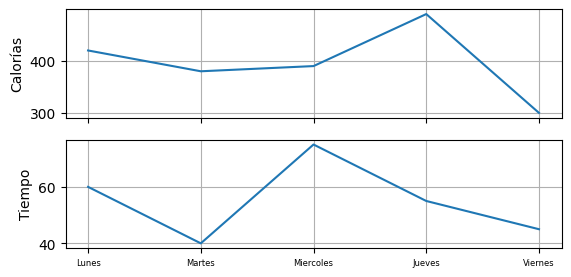

In [26]:
x = df.index.values
y1 = df['Calorias']
y2 = df['Tiempo']

ax1 = plt.subplot(311)
plt.plot(x, y1)
plt.tick_params('x', labelbottom=False)
plt.ylabel('Calorías')
plt.grid(True)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(x, y2)
plt.tick_params('x', labelsize=6)
plt.ylabel('Tiempo')
plt.grid(True)

plt.show()

#### Explicación:
Generé 2 gráficas que hacen referencia al mismo eje X, pero renombrando cada eje Y con su respectiva información para poder hacer la gráfica más digerible para el usuario.

### Ejercicio 5
El fichero coches.csv contiene información sobre los modelos de coches vendidos en USA durante un determinado año. Se pide:

A. Crear un DataFrame a partir del fichero anterior.

In [27]:
file = 'coches.csv'
coches = pd.read_csv(file)
print(coches)

     Marca                   Modelo   Tipo  Potencia  Precio
0    Acura                      MDX    SUV     265.0   33337
1    Acura           RSX Type S 2dr  Sedan     200.0   21761
2    Acura                  TSX 4dr  Sedan     200.0   24647
3    Acura                   TL 4dr  Sedan     270.0   30299
4    Acura               3.5 RL 4dr  Sedan     225.0   39014
..     ...                      ...    ...       ...     ...
423  Volvo  C70 LPT convertible 2dr  Sedan     197.0   38203
424  Volvo  C70 HPT convertible 2dr  Sedan     242.0   40083
425  Volvo               S80 T6 4dr  Sedan     268.0   42573
426  Volvo                      V40  Wagon     170.0   24641
427  Volvo                     XC70  Wagon     208.0   33112

[428 rows x 5 columns]


#### Explicación:
SIn problemas para abrir archivos csv utilizando pandas.

B. Eliminar las filas con valores desconocidos y mostrar el número de filas del DataFrame resultante.

In [28]:
coches = coches.dropna()
print(f'Número de filas en DF sin valores desconocidos: {len(coches)}')

Número de filas en DF sin valores desconocidos: 421


#### Explicación:
Eliminé las filas que contenían celdas vacías con dropna() y cuento el número de filas con len().

C. Crear una columna con el precio en euros (cambio 1$ = 0.94€)

In [29]:
coches['Precio EUR'] = coches['Precio'] * 0.94
print(coches)

     Marca                   Modelo   Tipo  Potencia  Precio  Precio EUR
0    Acura                      MDX    SUV     265.0   33337    31336.78
1    Acura           RSX Type S 2dr  Sedan     200.0   21761    20455.34
2    Acura                  TSX 4dr  Sedan     200.0   24647    23168.18
3    Acura                   TL 4dr  Sedan     270.0   30299    28481.06
4    Acura               3.5 RL 4dr  Sedan     225.0   39014    36673.16
..     ...                      ...    ...       ...     ...         ...
423  Volvo  C70 LPT convertible 2dr  Sedan     197.0   38203    35910.82
424  Volvo  C70 HPT convertible 2dr  Sedan     242.0   40083    37678.02
425  Volvo               S80 T6 4dr  Sedan     268.0   42573    40018.62
426  Volvo                      V40  Wagon     170.0   24641    23162.54
427  Volvo                     XC70  Wagon     208.0   33112    31125.28

[421 rows x 6 columns]


#### Explicación:
Para realizar operaciónes entre columnas y usando pandas, no hay problema.

D. Mostrar las 10 últimas filas del DataFrame.

In [30]:
print(coches.tail(10))

     Marca                   Modelo   Tipo  Potencia  Precio  Precio EUR
418  Volvo              S60 2.5 4dr  Sedan     208.0   29916    28121.04
419  Volvo               S60 T5 4dr  Sedan     247.0   32902    30927.88
420  Volvo                S60 R 4dr  Sedan     300.0   35382    33259.08
421  Volvo              S80 2.9 4dr  Sedan     208.0   35542    33409.48
422  Volvo             S80 2.5T 4dr  Sedan     194.0   35688    33546.72
423  Volvo  C70 LPT convertible 2dr  Sedan     197.0   38203    35910.82
424  Volvo  C70 HPT convertible 2dr  Sedan     242.0   40083    37678.02
425  Volvo               S80 T6 4dr  Sedan     268.0   42573    40018.62
426  Volvo                      V40  Wagon     170.0   24641    23162.54
427  Volvo                     XC70  Wagon     208.0   33112    31125.28


#### Explicación:
Tan simple como usar la función tail().

E. Mostrar el número de marcas de coches que contiene el DataFrame.

In [31]:
distintas_marcas = coches['Marca'].drop_duplicates()
print(f'El Dataframe contiene {len(distintas_marcas)} marcas distintas de coches')

El Dataframe contiene 38 marcas distintas de coches


#### Explicación:
Utilizo Drop para eliminar los duplicados y después poder contabilizar los elementos distintos dentro de la columna 'Marca'.

F. Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia.

In [32]:
modelos = pd.DataFrame(coches.groupby('Marca')['Modelo'].count())
modelos.rename(columns={'Modelo': 'Cantidad_Modelos'}, inplace=True)
print(modelos.sort_values(by=['Cantidad_Modelos'], ascending=False))

               Cantidad_Modelos
Marca                          
Toyota                       28
Chevrolet                    27
Mercedes-Benz                26
Ford                         23
BMW                          19
Audi                         19
Nissan                       17
Honda                        16
Volkswagen                   15
Chrysler                     14
Dodge                        13
Mitsubishi                   13
Volvo                        12
Hyundai                      12
Jaguar                       12
Kia                          11
Mazda                        11
Pontiac                      10
Subaru                       10
Lexus                        10
Lincoln                       9
Buick                         9
Mercury                       9
Cadillac                      8
Suzuki                        8
Infiniti                      8
GMC                           8
Saturn                        8
Saab                          7
Porsche 

#### Explicación:
Para este punto, creé un nuevo DF con la suma de los modelos de coches agrupado por la marca, renombre la columna 'Modelo' por 'Cantidad_Modelos' para hacer más entendible la información y finalmente muestro la tabla colocando un filtro descendente.

G. Mostrar cuál es la marca y el modelo del coche más caro.

In [33]:
mas_caro = coches['Precio'].max()
datos_mas_caro = coches[coches['Precio'] == mas_caro]
print(f"El coche más caro es el modelo {datos_mas_caro['Modelo'].values[0]} de la marca {datos_mas_caro['Marca'].values[0]}")

El coche más caro es el modelo 911 GT2 2dr de la marca Porsche


#### Explicación:
Primero, guardo el valor más caro de la columna 'Precio' en una variable que después utilizó como parte de la creación de un nuevo DF con un solo valor. Al final mando llamar sólo las columnas que necesito para completar el enunciado de la impresión.

H. Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio.

In [34]:
media_modelos = pd.DataFrame(coches.groupby('Marca')['Precio EUR'].mean())
print(media_modelos.sort_values(by=['Precio EUR'], ascending=False))

                 Precio EUR
Marca                      
Porsche        69243.085714
Mercedes-Benz  53066.109231
Jaguar         52732.511667
Cadillac       43641.262500
Hummer         43066.100000
Land Rover     39339.940000
Lexus          37501.864000
BMW            37391.864211
Audi           36970.298947
Lincoln        36787.631111
Acura          36275.405714
Saab           33483.068571
Volvo          32163.196667
Infiniti       30907.200000
Volkswagen     27901.706667
Buick          26183.595556
GMC            24712.012500
Mercury        24118.102222
Chrysler       23778.105714
Isuzu          23141.860000
Dodge          22710.472308
Chevrolet      22617.165926
Nissan         21617.622353
Subaru         21351.442000
Pontiac        20878.528000
Ford           20635.820000
Mitsubishi     20524.683077
Oldsmobile     20444.060000
Jeep           19856.560000
Toyota         19078.172857
Mazda          18980.907273
Honda          18773.092500
MINI           15779.780000
Saturn         15103

#### Explicación:
Utilizo groupby para agrupar, en este caso, la media del precio de cada marca. Esto lo guardo en un nuevo DF que después imprimo ordenado de mayor a menor.

I. Gráfica el diagrama de barras del porcentaje de modelos de cada marca.

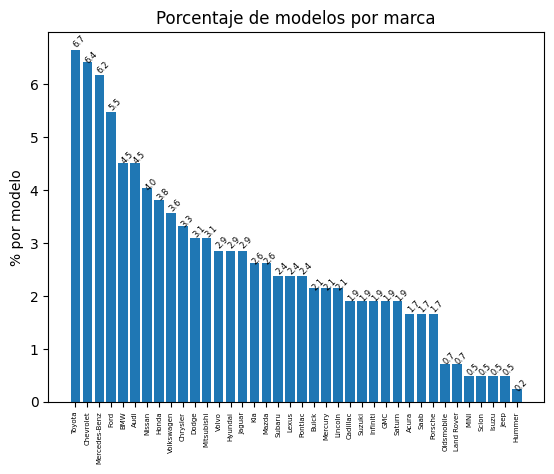

In [36]:
def add_value_label(eje_x,eje_y):
    for i in range(1, len(eje_x)+1):
        plt.text(i,round(eje_y[i-1],1),round(eje_y[i-1],1), ha="right", size=6, rotation=45)

modelos['Porcentaje'] = (modelos['Cantidad_Modelos'] / modelos['Cantidad_Modelos'].sum()) * 100
modelos = modelos.sort_values(by=['Porcentaje'], ascending=False)

fig, ax = plt.subplots()

marcas = modelos.index.values
porcentajes = modelos['Porcentaje']

ax.bar(marcas, porcentajes)
add_value_label(marcas,porcentajes)
plt.xticks(rotation=90, size=5)
ax.set_ylabel('% por modelo')
ax.set_title('Porcentaje de modelos por marca')
plt.show()

#### Explicación:
Aghregué una pequeña fuinción que me ayuda a mostrar el valor del porcentaje sobre cada una de las barras y hacer la información un poco más digerible. También utilicé "size" y "rotation" para ajustar el tamaño de los textos.

J. Gráfica el diagrama de dispersión de la potencia y el precio.

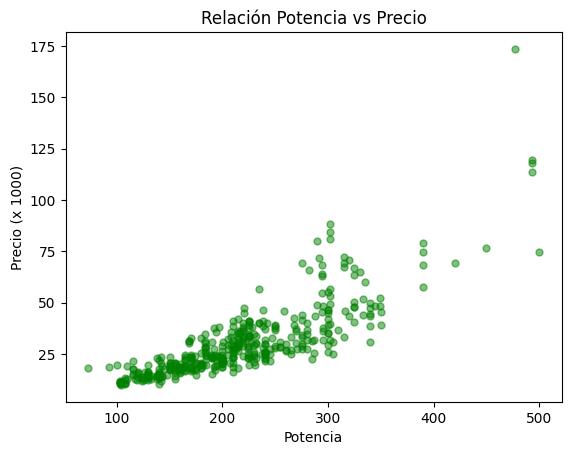

In [37]:
x = coches['Potencia']
y = (coches['Precio'] / 1000)
sizes = 100

fig, ax = plt.subplots()
ax.scatter(x, y, sizes, c="green", alpha=0.5, marker='.')
ax.set_xlabel("Potencia")
ax.set_ylabel("Precio (x 1000)")
ax.set_title('Relación Potencia vs Precio')
plt.show()

#### Explicación:
En este caso sólo modifiqué el tamaño de los puntos con la variable sizes y cambié el formato del punto (maker). Para el eje Y, divido los valores entgre 1000 para que las etiquetas del eje no abarquen tanto espacio.